In [1]:
# K - means 
# Define how many cluster points
# centroid tie every cluster and than rebuild model
# Step 1 : choose number of clusters
# Step 2 Select at random K points the centroids
# Step 3 Assign each data point to the closest centroid / That formes K - clusters
# step 4 Compute and place the new centroid of each cluster
# step 5 Reassign each data point to the new closest centroid
# Step 6 : if any reassigment took place , go to step 4 otherwise FIN

## K Means initialization Trap
# Clusters are very depended from initial centroids
# Centroids are calculated randomly so it can give bad aproaches
# K Means ++ happen in background
# There is a true cluster result

## K Means intuition
# Choosing the right number of clusters
# Algorithm finding out the right number of clusters
# Within clusters sum of squares (WCSS)
# WCSS = sum(sum(distance((pi,cluster_i)**2), cluster_j)
# WCSS changes chart based on cluster number
# Elbow method
# 

###########################
# import Libraries
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Importing the dataset
# must make UTS/Laptop varibales
ws_sub = r"K-Means Clustering"
ws = r"Data"
data_file = "Mall_Customers.csv"

data_file_path = os.path.join(os.path.join(os.path.join(ws, ws_sub), "data"),data_file)

dataset = pd.read_csv(data_file_path)
# dataset

# splitting the dataset
X = dataset.iloc[:, [3, 4]].values

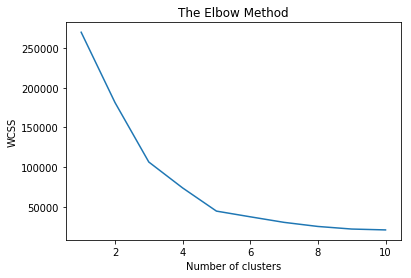

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    # n_clusters # number of clusters
    # init # initial method # beware default is random and can go to trap
    # max_iter # max number of iterations to find best fitting
    # n_init # number of initialization clusters 
    # random_state # seed randomization
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# visualise number of cluster performance
# Elbow method
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Elbow shows there are 5 clusters

In [5]:
# Applying KMeans to the mall dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

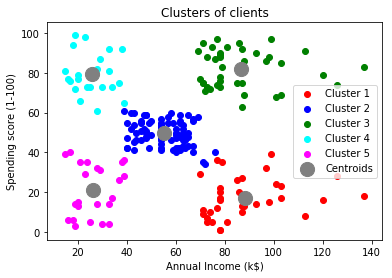

In [9]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'gray', s = 200, label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()